<h1 align=center>Capítulo 10 - Juntando tudo: projetando seu chatbot com spaCy</h1>
<p align=center><img src=https://blog.desdelinux.net/wp-content/uploads/2021/02/procesamiento-de-lenguaje-natural.png width=500></p>

Neste capítulo, você usará tudo o que aprendeu até agora para projetar um chatbot. Você realizará extração de entidade, reconhecimento de intenção e manipulação de contexto. Você usará diferentes formas de análise sintática e semântica, extração de entidade e classificação de texto.

Primeiro, você explorará o conjunto de dados que usaremos para coletar informações linguísticas sobre os enunciados nele. Em seguida, você executará a extração de entidade combinando o modelo spaCy de **reconhecimento de entidade nomeada (NER)** e a classe spaCy **Matcher**. Depois disso, você realizará o reconhecimento de intenção com duas técnicas diferentes: um método baseado em padrões e classificação estatística de texto com TensorFlow e Keras. Você treinará um LSTM em nível de caractere para classificar as intenções de expressão.

A seção final é uma seção dedicada à semântica em nível de sentença e diálogo. Você mergulhará profundamente em assuntos semânticos, como **resolução de anáforas**, **tipos de perguntas gramaticais** e **diferenciação de assuntos de objetos**.

No final deste capítulo, você estará pronto para projetar um pipeline de **entendimento de linguagem natural (NLU)** de chatbot real. Você reunirá o que aprendeu em todos os capítulos anteriores – linguística e estatisticamente – combinando vários componentes de pipeline spaCy, como **NER**, um **analisador de dependência** e um **tagger POS**.

Neste capítulo, abordaremos os seguintes tópicos principais:
* Introdução à IA conversacional
* Extração de entidade
* Reconhecimento de intenção

## Introdução à IA conversacional

Sejam bem-vindos ao nosso último e muito empolgante capítulo, onde você projetará um pipeline NLU de chatbot com spaCy e TensorFlow. Neste capítulo, você aprenderá as técnicas NLU para extrair significado das interações multiturno do chatbot-usuário. Ao aprender e aplicar essas técnicas, você dará um passo no **desenvolvimento de IA conversacional**.

Antes de mergulhar nos detalhes técnicos, há uma pergunta fundamental: o que é um chatbot? Onde podemos encontrar um? O que exatamente significa IA conversacional?

**A inteligência artificial conversacional (IA conversacional)** é um campo de aprendizado de máquina que visa criar tecnologia que permita que os usuários tenham interações baseadas em texto ou fala com máquinas. Chatbots, assistentes virtuais e assistentes de voz são produtos típicos de IA conversacional.

Um **chatbot** é um aplicativo de software projetado para fazer conversas com humanos em aplicativos de bate-papo. Os chatbots são populares em uma ampla variedade de áreas comerciais, incluindo RH, marketing e vendas, bancos e saúde, bem como em áreas pessoais e não comerciais, como conversa fiada. Muitas empresas comerciais, como a Sephora (a Sephora possui dois chatbots – um chatbot de maquiador virtual na plataforma de mensagens do Facebook e um chatbot de atendimento ao cliente novamente no Facebook Messenger), IKEA (a IKEA tem um chatbot de atendimento ao cliente chamado Anna), AccuWeather e muitos mais, atendimento ao cliente próprio e chatbots de perguntas frequentes.

Os serviços de mensagens instantâneas, como o Facebook Messenger e o Telegram, fornecem interfaces para os desenvolvedores conectarem seus bots. Essas plataformas também fornecem diretrizes detalhadas para desenvolvedores, como a documentação da API do Facebook Messenger: (https://developers.facebook.com/docs/messenger-platform/getting-start/quick-start/) ou a documentação da API do bot do Telegram: (https://core.telegram.org/bots).

Um **assistente virtual** também é um agente de software que executa algumas tarefas mediante solicitação ou pergunta do usuário. Um exemplo bem conhecido é o **Amazon Alexa**. Alexa é um assistente virtual baseado em voz e pode executar muitas tarefas, incluindo tocar música, definir alarmes, ler audiolivros, reproduzir podcasts e fornecer informações em tempo real sobre clima, trânsito, esportes e assim por diante. O Alexa Home pode controlar dispositivos domésticos inteligentes conectados e executar uma variedade de tarefas, incluindo acender e apagar as luzes, controlar a porta da garagem e assim por diante.

Outros exemplos conhecidos são Google Assistant e a Siri. A Siri está integrada em vários produtos da Apple, incluindo iPhone, iPad, iPod e macOS. No iPhone, a Siri pode fazer chamadas, atender chamadas e enviar e receber mensagens de texto, bem como mensagens do WhatsApp. O Google Assistant também pode executar uma ampla variedade de tarefas, como fornecer informações de voo, clima e tráfego em tempo real; enviar e receber mensagens de texto; configuração de alarmes; fornecimento de informações sobre a bateria do dispositivo; verificar sua caixa de entrada de e-mail; integração com dispositivos domésticos inteligentes; e assim por diante. O Google Assistant está disponível no Google Maps, na Pesquisa Google e em aplicativos autônomos para Android e iOS.

Aqui está uma lista dos assistentes virtuais mais populares e conhecidos para lhe dar mais algumas idéias do que está por aí:
* Amazon Alexa
* AllGenie do Alibaba Group
* Bixby da Samsung
* Celia da Huawei
* Duer do Baidu
* Google Assistant
* Microsoft Cortana
* Siri da Apple
* Xiaowei da Tencent

Todos esses assistentes virtuais são baseados em voz e geralmente são invocados com uma **palavra de ativação**. Uma palavra de ativação é uma palavra ou frase especial usada para ativar um assistente de voz. Alguns exemplos são *Hey Alexa*, *Hey Google* e *Hey Siri*, que são as palavras de ativação do Amazon Alexa, Google Assistant e Siri, respectivamente.

Agora vamos aos detalhes técnicos. Quais são os componentes de NLP desses produtos? Vejamos esses componentes da NLP em detalhes.

### Componentes de NLP de produtos de IA conversacional
Um produto típico de IA conversacional baseado em voz consiste nos seguintes componentes:
* **Componente de fala para texto**: converte a fala do usuário em texto. A entrada para este componente é um arquivo WAV/mp3 e a saída é um arquivo de texto contendo o enunciado do usuário como texto.
* **Componente NLU Conversacional**: Este componente realiza reconhecimento de intenção e extração de entidade no texto do enunciado do usuário. A saída é a intenção do usuário e uma lista de entidades. A resolução de referências no enunciado atual para os enunciados anteriores é feita neste componente (consulte a seção Resolução de anáfora).
* **Gerenciador de diálogo**: Mantém a memória da conversa para fazer um bate-papo significativo e coerente. Você pode pensar nesse componente como a memória de diálogo, pois esse componente geralmente mantém um **estado de diálogo**. O estado do diálogo é o estado da conversa: as entidades que apareceram até agora, as intenções que apareceram até agora e assim por diante. A entrada para este componente é o estado de diálogo anterior e o usuário atual analisado com intenção e entidades. A saída deste componente é o novo estado de diálogo.
* **Gerador de respostas**: Dadas todas as entradas das etapas anteriores, gera a resposta do sistema ao enunciado do usuário.
* **Text-to-speech**: Este componente gera um arquivo de fala (WAV ou mp3) a partir da resposta do sistema.

Cada um dos componentes é treinado e avaliado separadamente. Por exemplo, o componente de fala para texto é treinado em um corpus de fala anotado (o treinamento é feito em arquivos de fala e as transcrições correspondentes). O componente NLU é treinado na intenção e em uma entidade rotulada como corpus. Neste capítulo, vamos nos concentrar nas tarefas do componente NLU. Para produtos baseados em texto, o primeiro e os últimos componentes não são necessários e são substituídos pela integração do cliente de e-mail ou chat.

Há outro paradigma que é chamado de **compreensão da linguagem falada de ponta a ponta (SLU)**. Nas arquiteturas SLU, o sistema é treinado de ponta a ponta, o que significa que a entrada do sistema é um arquivo de fala e a saída é a resposta do sistema. Cada abordagem tem prós e contras.

Como vemos nos exemplos anteriores, a IA conversacional tornou-se um tema quente recentemente. Como profissional de NLP, é bem provável que você trabalhe para um produto de conversação ou trabalhe em uma área relacionada, como reconhecimento de fala, conversão de texto em fala ou resposta a perguntas. As técnicas apresentadas neste capítulo, como reconhecimento de intenção, extração de entidade e resolução de anáfora, também são aplicáveis a um amplo conjunto de problemas de NLU. Vamos mergulhar nas seções técnicas. Começaremos explorando o conjunto de dados que usaremos ao longo deste capítulo.

### Conhecendo o conjunto de dados
Nos Capítulos 6, 7, 8 e 9, trabalhamos em conjuntos de dados bem conhecidos do mundo real para fins de classificação de texto e extração de entidades. Nestes capítulos, sempre exploramos nosso conjunto de dados como a primeira tarefa. O ponto principal da exploração de dados é entender a natureza do texto do conjunto de dados para desenvolver estratégias em nossos algoritmos que possam lidar com esse conjunto de dados. Se nos lembrarmos do Capítulo 6, Juntando tudo: análise semântica com espaço, os pontos principais que devemos observar durante nossa exploração são os seguintes:
* Que tipo de enunciados existem? Os enunciados são textos curtos ou frases completas ou parágrafos ou documentos longos? Qual é a duração média do enunciado?
* Que tipo de entidades o corpus inclui? Nomes de pessoas, nomes de organizações, localizações geográficas, nomes de ruas? Quais queremos extrair?
* Como a pontuação é usada? O texto está pontuado corretamente ou nenhuma pontuação é usada?
* Como as regras gramaticais são seguidas? A capitalização está correta e os usuários seguiram as regras gramaticais? Existem palavras incorretas?

Os conjuntos de dados anteriores que usamos consistiam em pares (**text**, **class_label**) a serem usados em tarefas de classificação de texto ou (**text**, **list_of_entities**) pares a serem usados em tarefas de extração de entidade. Neste capítulo, abordaremos uma tarefa muito mais complicada, o design do chatbot. Assim, o conjunto de dados será mais estruturado e mais complicado.

Os conjuntos de dados de design do chatbot geralmente estão no formato JSON para manter a estrutura do conjunto de dados. Aqui, estrutura significa o seguinte:
* Manter a ordem dos enunciados do usuário e do sistema
* Marcar slots dos enunciados do usuário
* Rotular a intenção dos enunciados do usuário

Ao longo deste capítulo, usaremos o conjunto de dados **The Schema-Guided Dialogue (SGD)** do Google Research (https: //github.com/google-research-datasets/dstc8-schema-guided-dialogue). Esse conjunto de dados consiste em interações anotadas do assistente virtual do usuário. O conjunto de dados original contém mais de 20.000 segmentos de diálogo em diversas áreas, incluindo reservas de restaurantes, reservas de filmes, consultas meteorológicas e reservas de passagens. Os diálogos incluem enunciados do usuário e do assistente virtual turno a turno. Neste capítulo, não usaremos todo esse enorme conjunto de dados; em vez disso, usaremos um subconjunto sobre reservas em restaurantes.

Vamos começar com o download do conjunto de dados. Você pode baixar o conjunto de dados do repositório GitHub em https://github.com/PacktPublishing/Mastering-spaCy/blob/main/Chapter10/data/restaurants.json. Alternativamente, você pode escrever o seguinte código:

`$ wget https://github.com/PacktPublishing/Mastering-spaCy/blob/main/Chapter10/data/restaurants.json`

~~~python
{
"dialogue_id": "1_00000",
"turns": [
{
"speaker": "USER",
"utterance": "I am feeling hungry so I would like to find a
place to eat.",
"slots": [],
"intent": "FindRestaurants"
},
{
"speaker": "SYSTEM",
"utterance": "Do you have a specific which you want the
eating place to be located at?",
"slots": []
}
~~~
Em primeiro lugar, o conjunto de dados consiste em segmentos de diálogo e cada segmento de diálogo tem uma instância **dialogue_id**. Cada segmento de diálogo é uma lista ordenada de turnos e cada turno pertence ao usuário ou ao sistema. Um **segmento de diálogo** contém vários turnos; aqui, o campo de **turnos** é uma lista dos turnos do usuário/sistema. Cada elemento da lista de **turnos** é um turno. Um turno consiste em um falante (usuário ou sistema), o enunciado do locutor, uma lista de slots e uma intenção para os enunciados do usuário.

Aqui estão alguns exemplos de declarações de usuários do conjunto de dados:
~~~python
Hi. I'd like to find a place to eat.
I want some ramen, I'm really craving it. Can you find me an afforadable place in Morgan Hill?
I would like for it to be in San Jose.
Yes, please make a reservation for me.
No, Thanks
Hi i need a help, i am very hungry, I am looking for a restaurant
Yes, on the 7th for four people.
No. Can you change it to 1 pm on the 9th?
Yes. What is the phone number? Can I buy alcohol there?
~~~

Como vemos nesses exemplos de enunciados, letras maiúsculas e pontuação são usadas nos enunciados do usuário. Os usuários podem cometer erros de digitação, como a palavra **afforadable** na segunda frase. Existem alguns erros gramaticais também, como o uso errado de uma letra maiúscula na palavra **Thanks** na quinta frase. Outro erro de capitalização ocorre na sexta frase, onde o pronome *I* é escrito como **i** duas vezes.

Além disso, um enunciado pode conter várias frases. O primeiro enunciado começa com uma frase de saudação e as duas últimas frases começam com uma frase de resposta afirmativa ou negativa cada. A quarta frase também começa com um **Yes**, mas não como uma frase independente; em vez disso, é separado da segunda frase com uma vírgula.

O reconhecimento de intenção para enunciados de várias frases é um ponto ao qual precisamos prestar atenção em geral – esses tipos de enunciados podem conter vários intentos. Além disso, a geração de respostas para enunciados com várias frases é um pouco complicada; às vezes precisamos gerar apenas uma resposta (como para a segunda frase do código anterior) ou às vezes precisamos gerar uma resposta para cada frase do usuário (como para a última frase do código anterior).

Este é um conjunto de dados para reservas de restaurantes, então, naturalmente, inclui alguns slots nos enunciados do usuário, como local, culinária, hora, data, número de pessoas e assim por diante. Nosso conjunto de dados inclui os seguintes slots:

~~~python
city
cuisine
date
phone_number
restaurant_name
street_address
time
~~~
Aqui estão algumas frases de exemplo com os tipos de slot anteriores e seus valores:

~~~python
Find me Ethiopian/cuisine cuisine in Berkeley/city.
The phone number is 707-421-0835/phone_number. Your reservation is confirmed.
No, change the time to 7 pm/time and for one person only.
No, change it on next friday/date.
~~~
Agora, chegamos aos rótulos de classe para o reconhecimento de intenção e a distribuição desses rótulos de classe. Aqui está a distribuição de rótulos de classe:

~~~python
552 FindRestaurants
625 ReserveRestaurant
56 NONE
~~~

**NONE** é um rótulo de classe especial para enunciados que indicam o fim de uma conversa ou apenas um agradecimento. Essa classe de enunciados não está relacionada à reserva de restaurantes em geral. Os enunciados que pretendem listar restaurantes e obter algumas informações são rotulados com o rótulo de classe **FindRestaurants**, e os enunciados que incluem a intenção de fazer uma reserva são rotulados com **ReserveRestaurants**. Vejamos alguns exemplos de enunciados de cada classe:

~~~python
No, Thanks NONE
No, thank you very much. NONE
Nothing much. I'm good. NONE
I am feeling hungry so I would like to find a place to eat. FindRestaurants
Hi i need a help, i am very hungry, I am looking for a restaurant FindRestaurants
Ok, What is the address? How pricey are they? FindRestaurants
Please can you make the reservation ReserveRestaurant
That's good. Do they serve liquor and what is there number? ReserveRestaurant
Thank you so much for setting that up. ReserveRestaurant
~~~
Observamos que as frases de acompanhamento, como os enunciados 6, 8 e 9, são marcadas com as intenções **FindRestaurants** e **ReserveRestaurant**. Esses enunciados não contêm as intenções de encontrar/reservar diretamente, mas continuam o diálogo sobre encontrar/reservar um restaurante e ainda fazem consultas sobre o restaurante/reserva. Assim, embora não haja ações explícitas de encontrar/reservar expressas nesses enunciados, ainda assim as intenções são encontrar/reservar um restaurante.

É isso – coletamos informações suficientes sobre nosso conjunto de dados usando o trabalho preliminar desta seção. Com esses insights, estamos prontos para construir nosso pipeline de NLU. Começaremos extraindo as entidades de enunciado do usuário.

## Extração de entidade
Nesta seção, implementaremos a primeira etapa do nosso pipeline NLU do chatbot e extrairemos entidades dos enunciados do conjunto de dados. A seguir estão as entidades marcadas em nosso conjunto de dados:

~~~python
city
date
time
phone_number
cuisine
restaurant_name
street_address
~~~
Para extrair as entidades, usaremos o modelo spaCy NER e a classe spaCy **Matcher**. Vamos começar extraindo as entidades **city**.

### Extraindo entidades da cidade
Primeiro vamos extrair as entidades **city**. Começaremos lembrando algumas informações sobre o modelo spaCy NER e os rótulos de entidade do Capítulo 3, Recursos linguísticos e Capítulo 6, Juntando tudo: análise semântica com spaCy:
* Primeiro, lembramos que o rótulo de entidade nomeado spaCy para cidades e países é **GPE**. Vamos pedir ao spaCy para explicar a que rótulo **GPE** corresponde mais uma vez:

In [28]:
import spacy
nlp = spacy.load('en_core_web_md')
spacy.explain('GPE')

'Countries, cities, states'

* Em segundo lugar, lembramos também que podemos acessar entidades de um objeto **Doc** através da propriedade **ents**. Podemos encontrar todas as entidades em um enunciado que são rotuladas pelo modelo spaCy NER da seguinte forma:

In [29]:
import spacy
nlp = spacy.load("en_core_web_md")
doc = nlp("Can you please confirm that you want to book a table for 2 at 11:30 am at the Bird restaurant in Palo Alto for today")
doc.ents

(2, 11:30 am, Bird, Palo Alto, today)

In [30]:
for ent in doc.ents:
    print(f"ENTIDADE: {ent.text} - RÓTULO DA ENTIDADE:  {ent.label_}")

ENTIDADE: 2 - RÓTULO DA ENTIDADE:  CARDINAL
ENTIDADE: 11:30 am - RÓTULO DA ENTIDADE:  TIME
ENTIDADE: Bird - RÓTULO DA ENTIDADE:  ORG
ENTIDADE: Palo Alto - RÓTULO DA ENTIDADE:  GPE
ENTIDADE: today - RÓTULO DA ENTIDADE:  DATE


Neste segmento de código, listamos todas as entidades nomeadas desse enunciado chamando **doc.ents**. Em seguida, examinamos os rótulos de entidade chamando **ent.label_**. Examinando a saída, vemos que este enunciado contém cinco entidades – uma entidade de número **CARDINAL** (**2**), uma entidade **TIME** (**11:30 am**), uma entidade **ORG** (**Bird**, que pode ser um rótulo ideal para um restaurante), uma entidade **CITY** (**Palo Alto**) e uma entidade **DATE** (**today**). A entidade do tipo **GPE** é o que estamos procurando; **Palo Alto** é uma cidade nos EUA e, portanto, é rotulada pelo modelo spaCy NER como **GPE**. A partir da saída deste script, podemos ver que o modelo spaCy NER funciona muito bem neste corpus para entidades **GPE**. Não precisamos treinar o modelo spaCy NER com nossos dados personalizados. Extraímos entidades da cidade, e nosso chatbot sabe em qual cidade procurar um restaurante.

In [31]:
import spacy

nlp = spacy.load("en_core_web_md")


with open("utterances.txt", "r") as utterances:
    for utterance in utterances:
        utterance = utterance.strip()
        doc = nlp(utterance)
        ents = doc.ents
        if ents:
            for ent in ents:
                if ent.label_ == "GPE":
                    print(ent.text, "\t", utterance)

San Jose 	 I would like for it to be in San Jose.
San Jose 	 I see that at 71 Saint Peter there is a good restaurant which is in San Jose.
San Jose 	 How would you like Bazille restaurant which is situated in San Jose.
Palo Alto 	 Do you have another restaurant matching my needs? For example a restaurant which is economical and is located in Palo Alto.
Palo Alto 	 I see that 7 restaurants suit to what you requested. Bird Dog seems as a good restaurant and is located in Palo Alto.
Palo Alto 	 Can you please confirm that you want to book a table for 2 at 11:30 am at the Bird Dog restaurant in Palo Alto for today.
milpitas 	 Some Punjabi kind of foods in milpitas
Milpitas 	 I found a good restaurant in Milpitas, The restaurant name is Anjappar Chettinad Restaurant
Milpitas 	 I found another restaurant for you, Aria Dining & Banquets Fine Indian Cuisine Restaurant at Milpitas
Milpitas 	 I found 2 Restaurants, Olive garden Italian Restaurant at Milpitas
Milpitas 	 Please confirm the followi

Agora, vamos extrair datas e horários para permitir que nosso chatbot faça uma reserva real.

### Extraindo entidades de data e hora
A extração de entidades **DATE** e **TIME** é semelhante à extração de entidades **CITY**, que vimos na seção anterior. Voltaremos a examinar os enunciados do corpus e ver o sucesso do modelo spaCy NER na extração de entidades **DATE** e **TIME** de nosso corpus.

Vejamos alguns exemplos de enunciados do corpus:

In [32]:
import spacy
nlp = spacy.load("en_core_web_md")
sentences = [
    "I will be eating there at 11:30 am so make it for then.",
    "I'll reach there at 1:30 pm.",
    "No, change it on next friday",
    "Sure. Please confirm that the date is now next Friday and for 1 person.",
	"I need to make it on Monday next week at half past 12 in the afternoon.",
	"A quarter past 5 in the evening, please."
]

No código a seguir, extrairemos as entidades desses enunciados de exemplo:

In [33]:
for sent in sentences:
    doc = nlp(sent)
    ents = doc.ents
    print([(ent.text, ent.label_) for ent in ents])

[('11:30 am', 'TIME')]
[('1:30 pm', 'TIME')]
[('next friday', 'DATE')]
[('next Friday', 'DATE'), ('1', 'CARDINAL')]
[('Monday next week', 'DATE'), ('half past 12', 'CARDINAL')]
[('A quarter past 5', 'DATE'), ('evening', 'TIME')]


Parece bom! A saída parece bastante bem-sucedida:
* As entidades de horário **11:30 am** e **1:30 pm** da primeira e segunda frases são extraídas com sucesso.
* As entidades **DATE** na próxima **next friday** e **next Friday** da terceira e quarta frases também são extraídas. Observe que a primeira entidade inclui um erro de digitação: **friday** deve ser escrita como **Friday** – ainda assim, o modelo spaCy NER extraiu essa entidade com sucesso.
* A quinta frase incluiu uma entidade **DATE** e uma entidade **TIME**. Podemos dividir a entidade **DATE** **Monday next week** em duas partes: **Monday** – um dia da semana e **next week** – uma data relativa (a data exata depende da data do enunciado). Essa entidade consiste em dois sintagmas nominais: **Monday** (substantivo) e **next week** (substantivo adjetivo). spaCy pode lidar com essas entidades de várias palavras. A entidade de tempo, **half past 12**, desse enunciado também é uma entidade multipalavra. Essa entidade consiste em um substantivo (**half**), uma preposição (**past**) e um número (**12**).
* O mesmo vale para a entidade **TIME** multipalavra do sexto enunciado, **A quarter past 5**. Aqui está a árvore de dependências desta entidade:

In [34]:
from spacy import displacy
doc = nlp('A quarter past 5')
displacy.render(doc, style='dep')

Os exemplos anteriores parecem muito bons, mas que tal os seguintes enunciados:

In [35]:
sentences = [
    "Have a great day.",
    "Have a nice day.",
    "Have a good day",
    "Have a wonderful day.",
    "Have a sunny and nice day"
]
for sent in sentences:
    doc = nlp(sent)
    ents = doc.ents
    print([(ent.text, ent.label_) for ent in ents])

[]
[('a nice day', 'DATE')]
[('a good day', 'DATE')]
[]
[('nice day', 'DATE')]


Ops! Parece que temos alguns **falsos positivos** aqui. O modelo spaCy NER rotulou algumas frases, incluindo a palavra **day**, como entidades de data incorretamente. O que podemos fazer aqui?

Felizmente, essas correspondências falsas não formam um padrão como o **determinante** do **adjetivo dia**, porque as sequências de palavras **a great day** e **a wonderfull day** da primeira e quarta sentença não são rotuladas como entidades. Apenas as sequências de palavras **a nice day** e **a good day** são rotuladas como entidades. Então, podemos filtrar os resultados do spaCy NER com os dois padrões a seguir:

In [36]:
sentence = 'Have a nice day.'
doc = nlp(sentence)
wrong_matches = ["a good day", "a nice day"]
date_ents = [ent for ent in doc.ents if ent.label_ == "DATE"]
date_ents = list(filter(lambda e: e.text not in wrong_matches, date_ents))
date_ents

[]

O bloco de código anterior executa as seguintes etapas:
1. Primeiro, definimos uma lista de frases que não queremos que apareçam como entidades **DATE**.
2. Extraímos as entidades **DATE** do objeto **Doc** na terceira linha, iterando sobre todas as entidades de **doc** e escolhendo as entidades cujos rótulos eram **DATE**.
3. Na próxima linha, filtramos as entidades que não apareceram na lista de **correspondências erradas**.
4. Imprimimos o resultado. Como esperado, o resultado final da entidade de **date** é uma lista vazia.

Ótimo, extraímos as entidades **DATE** e **TIME** junto com as entidades **CITY**. Para todos os três tipos de entidade, usamos o modelo spaCy NER diretamente, porque spaCy NER reconhece entidades de data, hora e local. E quanto às entidades **phone_number**? O SpaCy NER não inclui esse rótulo. Então, usaremos alguns truques da classe **Matcher** para lidar com esse tipo de entidade. Vamos extrair os números de telefone.

### Extraindo números de telefone
Tivemos alguma prática da classe **Matcher** em entidades que incluem números no Capítulo 4, Correspondência Baseada em Regras. Também podemos nos lembrar do Capítulo 4, Correspondência Baseada em Regras, que combinar entidades de tipo numérico pode ser bastante complicado; extrair números de telefone especialmente requer atenção. Os números de telefone podem vir em diferentes formatos, com traços (212-44-44), códigos de área ((312) 790 12 31), códigos de país e de área (+49 30 456 222) e o número de dígitos difere de país para país. país. Como resultado, geralmente examinamos os seguintes pontos:
* Em quantos formatos de país as entidades de número de telefone do corpus são escritas?
* Como os blocos de dígitos são separados – com um traço, ou espaço em branco, ou ambos?
* Existe um bloco de código de área em alguns números de telefone?
* Existe um bloco de código de país em alguns números de telefone?
* Os blocos de código de país são precedidos por + ou 00, ou ambos os formatos são usados? Vamos examinar algumas de nossas entidades de número de telefone, então:
~~~python
You can call them at 415-775-1800. And they do not serve alcohol.
Their phone number is 408-374-3400 and they don't have live music.
Unfortunately no, they do not have live music, however here is the number: 510-558-8367.
~~~

Todas as entidades do tipo telefone ocorrem em enunciados do sistema. O chatbot busca números de telefone de restaurantes e os fornece aos usuários. O chatbot formou entidades de número de telefone colocando um traço entre os blocos de dígitos. Além disso, todos os números de telefone estão no formato de número de telefone dos EUA. Portanto, o formato do número de telefone é uniforme e tem a forma **ddd-ddd-dddd**. Isso é muito bom para definir um padrão **Matcher**. Podemos definir apenas um padrão e ele corresponde a todas as entidades de número de telefone. Vamos primeiro ver como um número de telefone de exemplo é tokenizado:

In [37]:
doc= nlp("The phone number is 707-766-7600.")
[token for token in doc]

[The, phone, number, is, 707, -, 766, -, 7600, .]

Cada bloco de dígitos é tokenizado como um token e cada caractere de traço é tokenizado como um token também. Portanto, em nosso padrão Matcher, procuraremos uma sequência de cinco tokens: um número de três dígitos, um traço, um número de três dígitos novamente, um traço novamente e, finalmente, um número de quatro dígitos. Então, nosso padrão Matcher deve ficar assim:

In [38]:
{"SHAPE": "ddd"}, {"TEXT": "-"}, {"SHAPE": "ddd"}, {"TEXT": "-"}, {"SHAPE": "dddd"}

({'SHAPE': 'ddd'},
 {'TEXT': '-'},
 {'SHAPE': 'ddd'},
 {'TEXT': '-'},
 {'SHAPE': 'dddd'})

Se você se lembrar do Capítulo 4, Correspondência Baseada em Regras, o atributo **SHAPE** se refere à forma do token. A forma do token representa a forma dos caracteres: **d** significa um dígito, **X** significa um caractere maiúsculo e **x** significa um caractere minúsculo. Portanto, **{"SHAPE": "ddd"}** significa um token que consiste em três dígitos. Esse padrão corresponderá a cinco tokens da forma **ddd-ddd-dddd**. Vamos tentar nosso novo padrão em um enunciado de corpus:

In [39]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)
pattern = [{"SHAPE": "ddd"},
           {"TEXT": "-"},
           {"SHAPE": "ddd"},
           {"TEXT": "-"},
           {"SHAPE": "dddd"}]
matcher.add("usPhoneNum", [pattern])
doc= nlp("The phone number is 707-766-7600.")
matches = matcher(doc)
for mid, start, end in matches:
    print(doc[start:end])

707-766-7600


Voilá! Nosso novo padrão correspondeu a uma entidade do tipo de número de telefone conforme o esperado! Agora, trataremos do tipo de cozinha para que nosso chatbot possa fazer uma reserva. Vamos ver como extrair o tipo de cozinha.

### Extraindo tipos de cozinha
Extrair tipos de cozinha é muito mais fácil do que extrair um número de pessoas ou tipos de telefone; na verdade, é semelhante à extração de entidades da cidade. Podemos usar um rótulo spaCy NER diretamente para tipos de cozinha – **NORP**. O rótulo de entidade **NORP** refere-se a grupos étnicos ou políticos:

In [40]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

Felizmente, os nomes das cozinhas em nosso corpus coincidem com as nacionalidades. Assim, os nomes das cozinhas são rotulados como NORP pelo NER da spaCy. Primeiro, vamos dar uma olhada em alguns enunciados de exemplo:
~~~python
Is there a specific cuisine type you enjoy, such as Mexican, Italian or something else?
I usually like eating the American type of food.
Find me Ethiopian cuisine in Berkeley.
I'm looking for a Filipino place to eat.
I would like some Italian food.
Malaysian sounds good right now.
~~~
Vamos extrair as entidades desses enunciados e examinar como o NER do spaCy rotula os tipos de cozinha da seguinte forma:

In [41]:
sentences = [
    "Is there a specific cuisine type you enjoy, such as Mexican,Italian or something else?",
	"I usually like eating the American type of food.",
    "Find me Ethiopian cuisine in Berkeley.",
    "I'm looking for a Filipino place to eat.",
    "I would like some Italian food.","Malaysian sounds good right now."
    ]
for sent in sentences:
    doc = nlp(sent)
    print([(ent.text, ent.label_) for ent in doc.ents])

[('Mexican', 'NORP'), ('Italian', 'NORP')]
[('American', 'NORP')]
[('Ethiopian', 'NORP'), ('Berkeley', 'GPE')]
[('Filipino', 'NORP')]
[('Italian', 'NORP')]
[('Malaysian', 'NORP')]


Agora, podemos extrair a cidade, data e hora, número de pessoas e entidades culinárias dos enunciados dos usuários. O resultado do módulo de extração de entidades nomeadas que construímos aqui carrega todas as informações que o chatbot precisa fornecer ao sistema de reservas. Aqui está um exemplo de enunciado anotado com entidades extraídas:

~~~python
I'd like to reserve an Italian place for 4 people by tomorrow 19:00 in Berkeley.
{
entities: {
	"cuisine": "Italian",
	"date": "tomorrow",
	"time": "19:00",
	"number_people": 4,
	"city": "Berkeley"
}
~~~

Aqui, concluímos a primeira parte de nossa análise semântica, extraindo entidades. Uma análise semântica completa também precisa de uma intenção. Agora, passaremos para a próxima seção e faremos o reconhecimento de intenção com o TensorFlow e o Keras.

## Reconhecimento de intenção
O **reconhecimento de intenção** (também chamado de **classificação de intenção**) é a tarefa de classificar os enunciados do usuário com rótulos predefinidos (intenções). A classificação de intenção é basicamente a classificação de texto. A classificação de intenção é uma tarefa de NLP bem conhecida e comum. O GitHub e o Kaggle hospedam muitos conjuntos de dados de classificação de intenção.

Em aplicativos de chatbot do mundo real, primeiro determinamos o domínio em que nosso chatbot deve funcionar, como finanças e bancos, saúde, marketing e assim por diante. Em seguida, executamos o seguinte loop de ações:
1. Determinamos um conjunto de intents que queremos suportar e preparamos um conjunto de dados rotulado de pares (**utterance, label**). Treinamos nosso classificador de *intent* nesse conjunto de dados.
2. Em seguida, implantamos nosso chatbot para os usuários e coletamos dados reais do usuário.
3. Em seguida, examinamos o desempenho do nosso chatbot com dados reais do usuário. Nesse estágio, geralmente, identificamos algumas novas intenções e alguns enunciados que nosso chatbot não conseguiu reconhecer. Estendemos nosso conjunto de *intents* com os novos *intents*, adicionamos os enunciados não reconhecidos ao nosso conjunto de treinamento e treinamos novamente nosso classificador de *intents*.
4. Vamos para a etapa 2 e executamos as etapas 2-3 até que a qualidade do chatbot NLU atinja um bom nível de precisão (> 0,95)

Nosso conjunto de dados é um conjunto de dados do mundo real; contém erros de digitação e erros gramaticais. Ao projetar nossos classificadores de intenção – especialmente ao fazer classificação baseada em padrões – precisamos ser robustos a esses erros.

Faremos o reconhecimento de intenção em duas etapas: *classificação de texto baseada em padrões* e *classificação estatística de texto*. Vimos como fazer classificação estatística de texto com *TensorFlow* e *Keras* no Capítulo 8, Classificação de texto com spaCy. Nesta seção, trabalharemos com *Tensorflow* e *Keras* novamente. Antes disso, veremos como projetar um classificador de texto baseado em padrões.

### Classificação de texto baseada em padrões
A **classificação baseada em padrões** significa classificar o texto combinando uma lista predefinida de padrões com o texto. Comparamos uma lista pré-compilada de padrões com os enunciados e verificamos se há correspondência.

Um exemplo imediato é a **classificação de spam**. Se um e-mail contiver um dos padrões, como *you won a lottery* e *I'm a Nigerian prince*, esse e-mail deve ser classificado como spam. **Classificadores baseados em padrões** são combinados com **classificadores estatísticos** para aumentar a precisão geral do sistema.

Ao contrário dos classificadores estatísticos, os classificadores baseados em padrões são fáceis de construir. Não precisamos fazer nenhum esforço para treinar um modelo do TensorFlow. Vamos compilar uma lista de padrões do nosso corpus e alimentá-los para o Matcher. Em seguida, o Matcher pode procurar correspondências de padrões em enunciados.

Para construir um classificador baseado em padrões, primeiro precisamos coletar alguns padrões. Nesta seção, classificaremos os enunciados com o rótulo **NONE**. Vamos ver alguns exemplos de enunciados primeiro:
~~~python
No, Thanks
No, thank you very much.
That is all thank you so much.
No, that is all.
Nope, that'll be all. Thanks!
No, that's okay.
No thanks. That's all I needed help with.
No. This should be enough for now.
No, thanks.
No, thanks a lot.
No, thats all thanks.
~~~

Observando esses enunciados, vemos que os enunciados com o rótulo **NONE** seguem alguns padrões:
 * A maioria dos enunciados começa com **No,** ou **No.**.
 * Padrões de *thank you* também são bastante comuns. Os padrões **Thanks, thank you** e **thanks a lot** ocorrem na maioria dos enunciados no código anterior.
 * Algumas frases auxiliares como **that is all, that'll be all, that's OK,** e **this should be enough** também são comumente usadas.

Com base nessas informações, podemos criar três padrões de Matcher da seguinte forma:

In [42]:
[{"LOWER": {"IN": ["no", "nope"]}}, {"TEXT": {"IN": [",", "."]}}]
[{"TEXT": {"REGEX": "[Tt]hanks?"}}, {"LOWER": {"IN": ["you", "a lot"]}, "OP": "*"}]
[{"LOWER": {"IN": ["that", "that's", "thats", "that'll", "thatll"]}}, {"LOWER": {"IN": ["is", "will"]}, "OP": "*"},{"LOWER": "all"}]

[{'LOWER': {'IN': ['that', "that's", 'thats', "that'll", 'thatll']}},
 {'LOWER': {'IN': ['is', 'will']}, 'OP': '*'},
 {'LOWER': 'all'}]

Vamos examinar os padrões um por um:
* O primeiro padrão corresponde às sequências de token **no,**, **no.**, **nope,**, **nope.**, **No,**, **No.**, **Nope,**, e **Nope.**. O primeiro item corresponde a dois tokens **no** e **nope** em maiúsculas ou minúsculas. O segundo item corresponde aos sinais de pontuação **,** e **.**.
* O segundo padrão corresponde a **thank**, **thank you**, **thanks**, e **thanks a lot,**, em maiúsculas ou minúsculas. O primeiro item corresponde a **thank** e **thanks s?**. Na sintaxe regex, o caractere **s** é opcional. O segundo item corresponde às palavras **you** e **a lot**, que possivelmente podem seguir **thanks?**. O segundo item é opcional; portanto, o padrão corresponde a **thanks** e **thank** também. Usamos o operador **OP: *** para tornar o segundo item opcional; Lembre-se do Capítulo 4, Correspondência Baseada em Regras, que o Matcher suporta a sintaxe do operador com diferentes operadores, como *** , + e ?**.
* O terceiro padrão corresponde às sequências de tokens que é **that is all**, **that's all**, **thats all**, e assim por diante. Observe que o primeiro item inclui algumas palavras com erros ortográficos, como **thats** e **thatll**. Incluímos as palavras com erros ortográficos de propósito, para que a correspondência seja mais robusta aos erros de digitação do usuário.

Diferentes combinações dos três padrões anteriores corresponderão aos enunciados da classe **NONE**. Você pode experimentar os padrões adicionando-os a um objeto Matcher e ver como eles combinam.
> #### DICA PRO
 > Ao projetar um sistema baseado em regras, tenha sempre em mente que os dados do usuário não são perfeitos. Os dados do usuário contêm erros de digitação, erros gramaticais e capitalização errada. Sempre mantenha a robustez como alta prioridade e teste seus padrões nos dados do usuário.

Fizemos um classificador estatístico sem modelo usando alguns padrões comuns e classificamos uma intenção com sucesso. E quanto às outras duas intenções – **FindRestaurants** e **ReserveRestaurant?** Enunciados dessas duas intenções são semanticamente muito mais complicados, então não podemos lidar com listas de padrões. Precisamos de modelos estatísticos para reconhecer essas duas intenções. Vamos treinar nossos classificadores de texto estatísticos com TensorFlow e Keras.

### Classificando texto com um LSTM em nível de caractere

Nesta seção, treinaremos uma **arquitetura LSTM em nível de caractere para reconhecer as intenções**. Já praticamos classificação de texto com TensorFlow e Keras no Capítulo 8, Classificação de texto com spaCy. Lembre-se deste capítulo que LSTMs são modelos sequenciais que processam uma entrada em uma etapa de tempo. Alimentamos uma palavra em cada passo de tempo da seguinte forma:

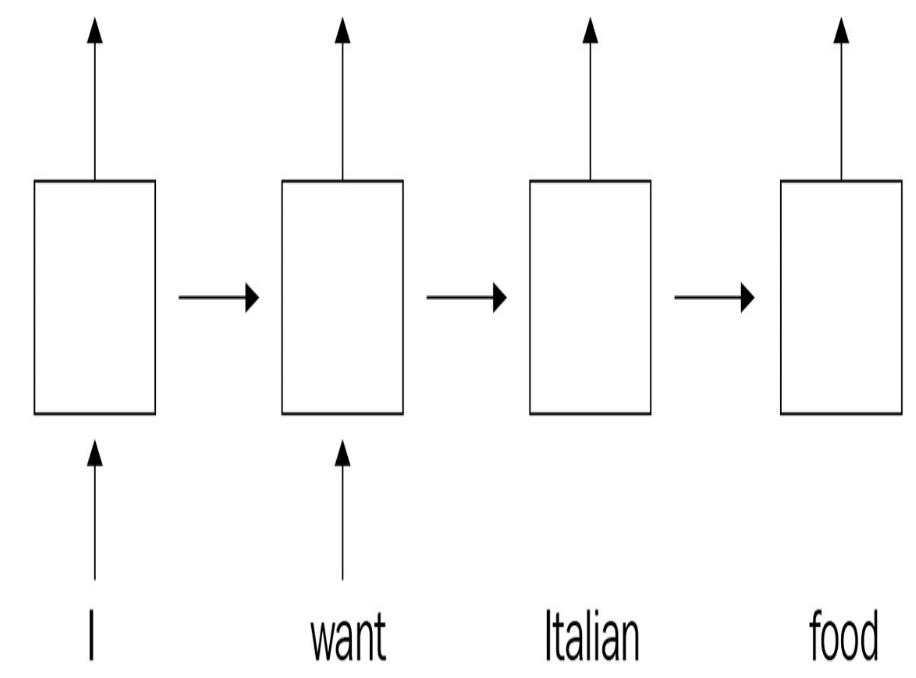

In [1]:
from IPython.display import Image
Image('images/LTSM.PNG')

Como observamos no Capítulo 8, Classificação de texto com spaCy, os LSTMs têm um estado interno (você pode pensar nisso como uma memória), de modo que os LSTMs podem modelar as dependências sequenciais na sequência de entrada mantendo informações passadas em seu estado interno.

Nesta seção, vamos treinar um LSTM de nível caractere. Como o nome sugere, alimentaremos os enunciados caractere por caractere, não palavra por palavra. Cada enunciado será representado como uma sequência de caracteres. A cada passo de tempo, alimentaremos um caractere. É assim que alimenta o enunciado da Figura anterior:

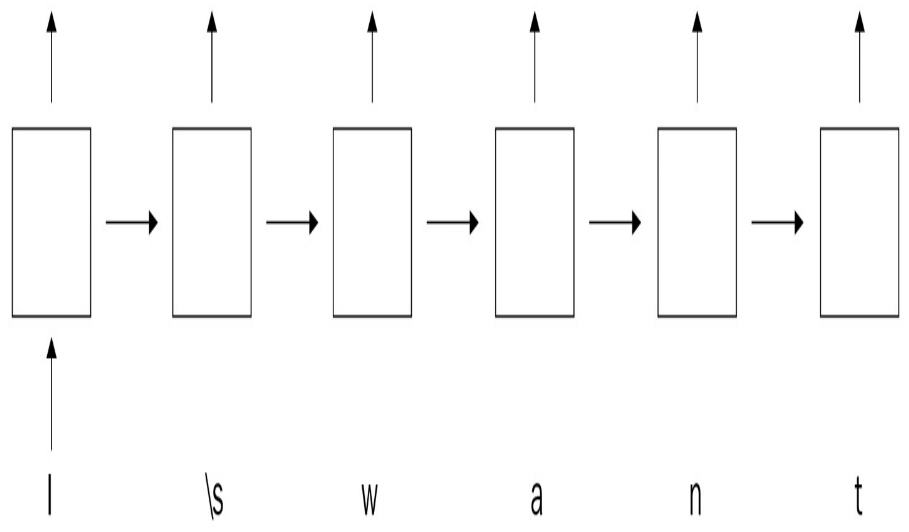

In [2]:
Image('images/LTSM1.PNG')

Notamos que o caractere de espaço também é alimentado como entrada, pois o caractere de espaço também faz parte do enunciado; para tarefas de nível de caractere, não há distinção entre dígitos, espaços e letras.

Vamos começar a construir o modelo Keras. Vamos pular a etapa de preparação de dados aqui. Você pode encontrar o código completo no notebook de classificação de intenção https://github.com/PacktPublishing/Mastering- spaCy/blob/main/Chapter10/Intent-classifier-char-LSTM.ipynb.

Começaremos diretamente com o Tokenizer do Keras para criar um vocabulário. Lembre-se do Capítulo 8, Classificação de texto com spaCy, que usamos o Tokenizer para fazer o seguinte:
* Criar um vocabulário a partir das sentenças do conjunto de dados.
* Atribua um ID de token a cada token do conjunto de dados.
* Transforme frases de entrada em IDs de token.

Vamos ver como executar cada etapa:
1. No Capítulo 8, Classificação de texto com spaCy, tokenizamos as frases em palavras e atribuímos IDs de token às palavras. Desta vez, dividiremos a frase de entrada em seus caracteres e atribuiremos IDs de token aos caracteres. O Tokenizer fornece um parâmetro chamado **char_level**. Aqui está o código do Tokenizer para tokenização em nível de caractere:

In [7]:
import json
utterances = []
labels = []

with open("restaurants.json", "r") as jfile:
    data = json.load(jfile)

    for dialogue in data:
        turns = dialogue["turns"]
        for turn in turns:
            speaker = turn["speaker"]
            if speaker == "USER":
                utterance, intent = turn["utterance"], turn["intent"]
                label = 1 if intent == "FindRestaurants" else 0
                utterances.append(utterance)
                labels.append(label)

utterances[:10]

['I am feeling hungry so I would like to find a place to eat.',
 'I would like for it to be in San Jose.',
 'I usually like eating the American type of food.',
 'Can you give me the address of this restaurant.',
 'Can you give me the phone number that I can contact them with?',
 'Is there some other restaurant which you can suggest?',
 'Do you have another restaurant matching my needs? For example a restaurant which is economical and is located in Palo Alto.',
 'Alright, that seems good. I would like to make a booking at this restaurant.',
 'I will be eating there at 11:30 am so make it for then.',
 'That suits me well. Can you tell me if they feature live music?']

In [8]:
labels[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 0, 0]

In [9]:
len(utterances), len(labels)

(1233, 1233)

In [10]:
from sklearn.utils import shuffle
#Vamos embaralhar para melhorar. Assinalar um random_state para deixar reprodutível os resultados.
utterances, labels = shuffle(utterances, labels, random_state=0)

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Vamos aplicar ao nível caractere=True e realizar alguns filtros de sinais desnecessários.
tokenizer = Tokenizer(char_level=True,filters=".,;'\"-", lower=True)
tokenizer.fit_on_texts(utterances)

2. O segmento de código anterior criará um vocabulário a partir dos caracteres de entrada. Usamos o parâmetro **lower=True**, então todos os caracteres da sentença de entrada são tornados minúsculos pelo Tokenizer. Após inicializar o objeto **Tokenizer** em nosso vocabulário, agora podemos examinar seu vocabulário. Aqui estão os 10 primeiros itens do vocabulário Tokenizer:

In [26]:
for key, value in tokenizer.word_index.items():
	if value <11:
		print(key,value)

  1
e 2
a 3
t 4
o 5
n 6
i 7
r 8
s 9
h 10


Assim como no vocabulário em nível de palavra, o índice **0** é reservado para um token especial, que é o caractere de preenchimento. Lembre-se do Capítulo 8, Classificação de texto com spaCy, que Keras não pode processar sequências de comprimento variável; cada sentença no conjunto de dados deve ter o mesmo comprimento. Portanto, preenchemos todas as frases com um comprimento máximo anexando um caractere de preenchimento ao final ou início da frase.
3. Em seguida, converteremos cada sentença do conjunto de dados em IDs de token. Isso é feito chamando o método **text_to_sequences** do Tokenizer:

In [27]:
utterances = tokenizer.texts_to_sequences(utterances)
utterances[0]

[17,
 2,
 9,
 25,
 1,
 7,
 1,
 22,
 3,
 6,
 4,
 1,
 7,
 4,
 1,
 5,
 6,
 1,
 4,
 10,
 2,
 1,
 28,
 28,
 4,
 10]

4. Em seguida, preencheremos todas as frases de entrada para um comprimento de **150**:

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Pegando com base a frase com maior número de caracteres.
mutt_len = max([len(ans) for ans in utterances])
print(mutt_len)


MAX_LEN = 150
utterances = pad_sequences(utterances, MAX_LEN, padding="post")

156


Estamos prontos para alimentar nosso conjunto de dados transformado em nosso modelo LSTM. Nosso modelo é simples, mas muito eficiente: colocamos uma camada densa em cima de uma camada LSTM bidirecional. Aqui está a arquitetura do modelo:

In [36]:
# O tensorflow gera um np.array como saída.
type(utterances[0]), type(utterances[1])

(numpy.ndarray, numpy.ndarray)

In [37]:
import numpy as np
# para facilitar vamos nomear utterantes e labels como np.array (facilita na inserção do código)
utterances, labels = np.array(utterances), np.array(labels)
utterances.shape, labels.shape

((1233, 150), (1233,))

In [38]:
from tensorflow.keras.layers import LSTM,Dense, Conv1D, MaxPooling1D, Bidirectional, Dropout, Input, Embedding

utt_in = Input(shape=(MAX_LEN,))

embedding_layer =  Embedding(input_dim = len(tokenizer.word_index)+1, output_dim = 100, input_length=MAX_LEN)
lstm =  Bidirectional(LSTM(units=100, return_sequences=False))

utt_embedding = embedding_layer(utt_in)
utt_encoded = lstm(utt_embedding)

output = Dense(1, activation='sigmoid')(utt_encoded)

Uma camada LSTM bidirecional significa dois LSTMs empilhados um em cima do outro. O primeiro LSTM percorre a sequência de entrada da esquerda para a direita (na direção para frente) e o segundo LSTM percorre a sequência de entrada da direita para a esquerda (na direção para trás). Para cada passo de tempo, as saídas do LSTM direto e do LSTM retroativo são concatenadas para gerar um único vetor de saída. A figura a seguir mostra nossa arquitetura com um LSTM bidirecional:

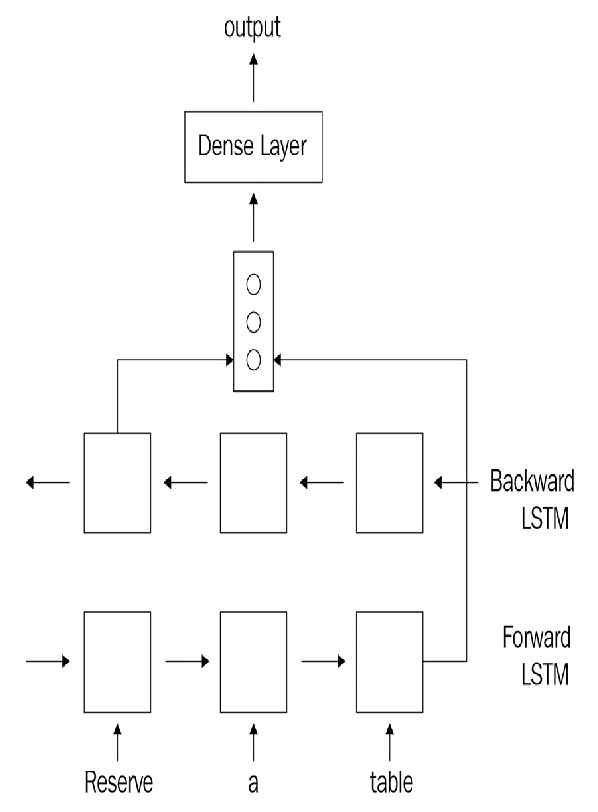

In [42]:
Image('images/bidirecional_LTSM.PNG')

5. Em seguida, compilamos nosso modelo e o treinamos em nosso conjunto de dados chamando **model.fit**:

In [43]:
from tensorflow.keras.models import Model
model = Model(utt_in, output)
model.compile(loss = 'binary_crossentropy', optimizer = "adam", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 100)          4700      
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 165,701
Trainable params: 165,701
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(utterances, labels, validation_split=0.1, epochs = 10, batch_size = 64)

Epoch 1/10
18/18 [==============================] - 6s 82ms/step - loss: 0.6791 - accuracy: 0.5546 - val_loss: 0.6431 - val_accuracy: 0.6774
Epoch 2/10
18/18 [==============================] - 1s 32ms/step - loss: 0.6000 - accuracy: 0.7205 - val_loss: 0.5119 - val_accuracy: 0.8145
Epoch 3/10
18/18 [==============================] - 1s 31ms/step - loss: 0.5139 - accuracy: 0.7619 - val_loss: 0.4601 - val_accuracy: 0.7984
Epoch 4/10
18/18 [==============================] - 1s 31ms/step - loss: 0.4405 - accuracy: 0.8007 - val_loss: 0.3567 - val_accuracy: 0.8548
Epoch 5/10
18/18 [==============================] - 1s 31ms/step - loss: 0.3871 - accuracy: 0.8503 - val_loss: 0.3595 - val_accuracy: 0.8629
Epoch 6/10
18/18 [==============================] - 1s 30ms/step - loss: 0.3521 - accuracy: 0.8683 - val_loss: 0.3520 - val_accuracy: 0.8871
Epoch 7/10
18/18 [==============================] - 1s 31ms/step - loss: 0.3103 - accuracy: 0.8792 - val_loss: 0.2921 - val_accuracy: 0.9032
Epoch 8/10
18

Aqui, compilamos nosso modelo com o seguinte:
1. Perda de entropia cruzada binária, porque esta é uma tarefa de classificação binária (temos dois rótulos de classe).
2. O otimizador **Adam**, que ajudará o procedimento de treinamento a ser executado mais rapidamente, organizando o tamanho das etapas de treinamento.
3. *Accuracy** como nossa métrica de sucesso. A *Accuracy* é calculada comparando a frequência com que o rótulo previsto é igual ao rótulo real.

Depois de ajustar nosso modelo, nosso modelo fornece uma precisão de **0,9032** no conjunto de validação, o que é bastante bom. Agora, resta apenas uma pergunta: por que preferimos treinar um modelo de nível de personagem desta vez? Os modelos em nível de caractere definitivamente têm algumas vantagens:
* Os modelos em nível de caractere são altamente tolerantes a erros de ortografia. Considere a palavra incorreta **charactr** – se o e está faltando ou não, não afeta muito a semântica geral da frase. Para nosso conjunto de dados, nos beneficiaremos dessa robustez, pois já vimos erros de ortografia de usuários em nossa exploração de conjunto de dados.
* O tamanho do vocabulário é menor do que um modelo de nível de palavra. O número de caracteres no alfabeto (para qualquer idioma) é fixo e baixo (no máximo 50 caracteres, incluindo letras maiúsculas e minúsculas, dígitos e alguma pontuação); mas o número de palavras em uma língua é muito maior. Como resultado, os tamanhos dos modelos podem diferir. A principal diferença está na camada de incorporação; uma tabela de incorporação é de tamanho (**vocabulary_size, output_dim**) (consulte o código do modelo). Dado que as dimensões de saída são as mesmas, **50 linhas** são muito pequenas em comparação com milhares de linhas.

Nesta seção, conseguimos extrair a intenção do usuário dos enunciados. O reconhecimento de intenção é o principal passo para entender a semântica da sentença, mas há algo mais? Na próxima seção, vamos mergulhar na semântica em nível de frase e em nível de diálogo. Mais análise semântica.

Esta é uma seção exclusivamente sobre chatbot NLU. Nesta seção, exploraremos informações semânticas e sintáticas em nível de sentença para gerar uma compreensão mais profunda dos enunciados de entrada, além de fornecer pistas para a geração de respostas.

No restante desta seção, pense no componente de geração de respostas como uma caixa preta. Fornecemos a análise semântica da frase e ela gera uma resposta com base nessa análise semântica. Vamos começar dissecando a sintaxe das frases e examinando os sujeitos e objetos dos enunciados.

### Diferenciando sujeitos de objetos
Lembre-se do Capítulo 3, Características linguísticas, que uma sentença tem dois componentes gramaticais importantes: um **sujeito** e um **objeto**. O sujeito é a pessoa ou coisa que realiza a ação dada pelo verbo da frase:

* **Mary** picked up her brother.
* **He** was a great performer.
* **It** was rainy on Sunday.
* **Who** is responsible for this mess?
* **The cat** is very cute.
* **Seeing you** makes me happy.

Um sujeito pode ser um substantivo, um pronome ou uma frase nominal.

Um objeto é a coisa ou pessoa sobre a qual o sujeito realiza a ação dada pelo verbo. Um objeto pode ser um substantivo, um pronome ou uma frase nominal também. aqui estão alguns exemplos:
* Lauren lost **her book**.
I gave **her**/direct object **a book**/indirect object.

Até aqui tudo bem, mas como essa informação nos ajuda em nosso chatbot NLU? Extrair o sujeito e o objeto nos ajuda a entender a estrutura da frase, adicionando mais uma camada à análise semântica da frase. As informações do sujeito e do objeto da sentença estão diretamente relacionadas à geração de respostas. Vejamos alguns exemplos de enunciados do nosso conjunto de dados:

* Where is this restaurant?

A figura a seguir mostra a análise de dependência desse enunciado. O assunto é a frase nominal **this restaurant**: